In [1]:
!pip install python-louvain
import pandas as pd                # manipulación de datos
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
from itertools import cycle
import community


In [2]:
# Definir las rutas de los archivos CSV
path1 = "srep00196-s2.csv"
path2 = "srep00196-s3.csv"

In [3]:
# Leer el primer archivo CSV
df1 = pd.read_csv(path1, comment='#', header=None, names=["Ingredient 1", "Ingredient 2", "frecuencia"])
df2 = pd.read_csv(path2, comment='#', header=None, delimiter=' ')
#Creación de columnas
nuevas_columnas = df2[0].str.split(',', expand=True)
#Asignación de nombre de las columnas
nuevas_columnas.columns = ['Type of cuisine'] + ['Ingredient_' + str(i) for i in range(1, len(nuevas_columnas.columns))]
# Reemplazar los valores nulos por una cadena vacía
nuevas_columnas.fillna('', inplace=True)
df2= nuevas_columnas

In [4]:
print(df1.info())
print(df1.head(8))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221777 entries, 0 to 221776
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Ingredient 1  221777 non-null  object
 1   Ingredient 2  221777 non-null  object
 2   frecuencia    221777 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB
None
        Ingredient 1   Ingredient 2  frecuencia
0  black_sesame_seed      rose_wine           3
1             fennel     wild_berry           5
2       comte_cheese          grape          57
3               nira       raw_beef           1
4      corn_mint_oil  parsnip_fruit           2
5            soybean  vegetable_oil           1
6        bell_pepper     naranjilla           5
7            chervil       crayfish           1


In [5]:
print(df1.isnull().sum())

Ingredient 1    0
Ingredient 2    0
frecuencia      0
dtype: int64


In [6]:
# Obtener estadísticas descriptivas de las columnas numéricas
print(df1.describe())

          frecuencia
count  221777.000000
mean        9.077163
std        15.570641
min         1.000000
25%         1.000000
50%         2.000000
75%         9.000000
max       227.000000


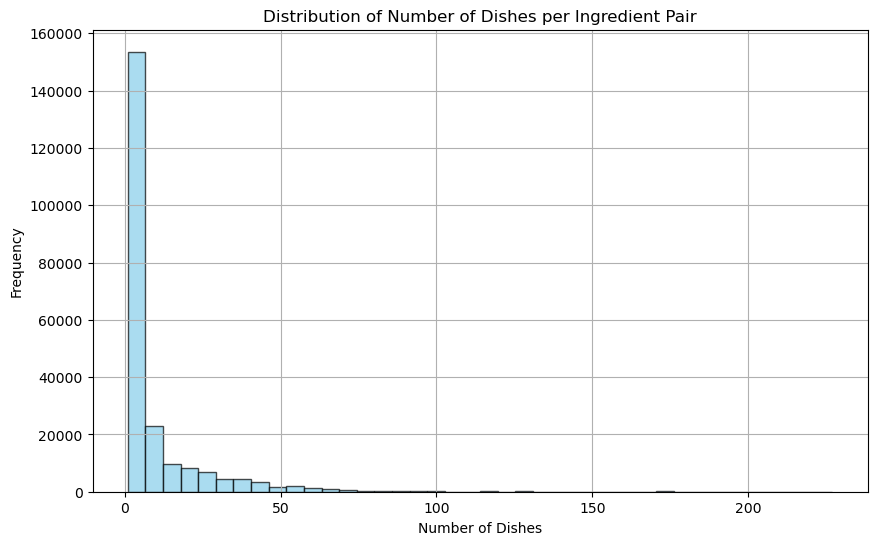

In [7]:
# Histogram for the number of dishes in which ingredient pairs are present
plt.figure(figsize=(10, 6))
plt.hist(df1.iloc[:, 2], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Number of Dishes per Ingredient Pair")
plt.xlabel("Number of Dishes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

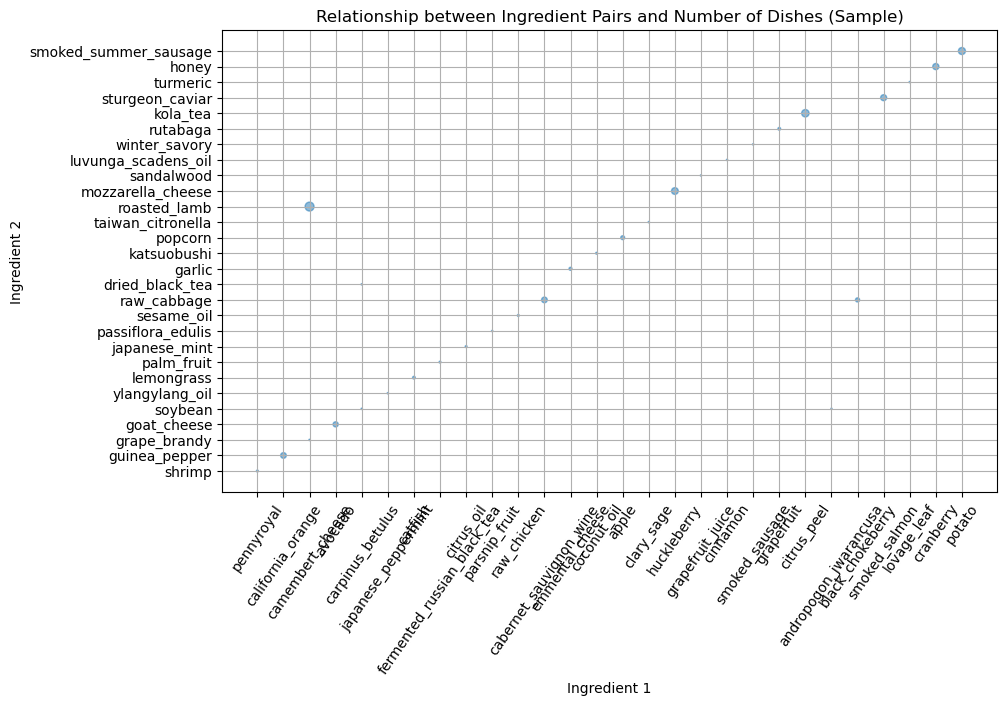

In [8]:
# Seleccionar una muestra aleatoria de 40 filas
df1_sample = df1.sample(n=30, random_state=42)

# Scatter plot con la muestra aleatoria
plt.figure(figsize=(10, 6))
plt.scatter(df1_sample['Ingredient 1'], df1_sample['Ingredient 2'], s=df1_sample.iloc[:, 2], alpha=0.5)
plt.title("Relationship between Ingredient Pairs and Number of Dishes (Sample)")
plt.xlabel("Ingredient 1")
plt.ylabel("Ingredient 2")
plt.xticks(rotation=55)  # Rotar los nombres en el eje x
plt.grid(True)
plt.show()


In [9]:
print(df2.info())
print(df2.head(8))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56498 entries, 0 to 56497
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Type of cuisine  56498 non-null  object
 1   Ingredient_1     56498 non-null  object
 2   Ingredient_2     56498 non-null  object
 3   Ingredient_3     56498 non-null  object
 4   Ingredient_4     56498 non-null  object
 5   Ingredient_5     56498 non-null  object
 6   Ingredient_6     56498 non-null  object
 7   Ingredient_7     56498 non-null  object
 8   Ingredient_8     56498 non-null  object
 9   Ingredient_9     56498 non-null  object
 10  Ingredient_10    56498 non-null  object
 11  Ingredient_11    56498 non-null  object
 12  Ingredient_12    56498 non-null  object
 13  Ingredient_13    56498 non-null  object
 14  Ingredient_14    56498 non-null  object
 15  Ingredient_15    56498 non-null  object
 16  Ingredient_16    56498 non-null  object
 17  Ingredient_17    56498 non-null

In [10]:
df2.head(10)

Type of cuisine   Ingredient_1 Ingredient_2 Ingredient_3  Ingredient_4  \
0         African        chicken     cinnamon    soy_sauce         onion   
1         African  cane_molasses       ginger        cumin        garlic   
2         African         butter       pepper        onion      cardamom   
3         African      olive_oil       pepper        wheat          beef   
4         African          honey        wheat        yeast                 
5         African         tomato     cilantro  lemon_juice         onion   
6         African          wheat      cassava                              
7         African      olive_oil        onion       potato  black_pepper   
8         African         tomato    fenugreek       pepper         onion   
9         African         banana                                           

  Ingredient_5  Ingredient_6    Ingredient_7 Ingredient_8 Ingredient_9  ...  \
0       ginger                                                          ...   
1     tamarind         bread       coriander      vinegar        onion  ...   
2      cayenne        ginger  cottage_cheese       garlic     brassica  ...   
3        onion      cardamom           cumin       garlic         rice  ...   
4                                                                       ...   
5      cayenne      scallion                                            ...   
6                                                                       ...   
7        cumin        carrot         cabbage     turmeric               ...   
8       potato  black_pepper          ginger       carrot       garlic  ...   
9                                                                       ...   

  Ingredient_23 Ingredient_24 Ingredient_25 Ingredient_26 Ingredient_27  \
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
5                                                                         
6                                                                         
7                                                                         
8                                                                         
9                                                                         

  Ingredient_28 Ingredient_29 Ingredient_30 Ingredient_31 Ingredient_32  
0                                                                        
1                                                                        
2                                                                        
3                                                                        
4                                                                        
5                                                                        
6                                                                        
7                                                                        
8                                                                        
9                                                                        

[10 rows x 33 columns]

In [11]:
# Count the number of recipes per type of cuisine
num_recipes_per_cuisine = df2['Type of cuisine'].value_counts()

# Count the number of ingredients per type of cuisine
num_ingredients_per_cuisine = df2.drop(columns=['Type of cuisine']).apply(lambda x: x.notnull().sum(), axis=1)

# Print the statistical summary
print("Number of Recipes per Type of Cuisine:\n", num_recipes_per_cuisine)


Number of Recipes per Type of Cuisine:
 NorthAmerican       41524
SouthernEuropean     4180
LatinAmerican        2917
WesternEuropean      2659
EastAsian            2512
MiddleEastern         645
SouthAsian            621
SoutheastAsian        457
EasternEuropean       381
African               352
NorthernEuropean      250
Name: Type of cuisine, dtype: int64


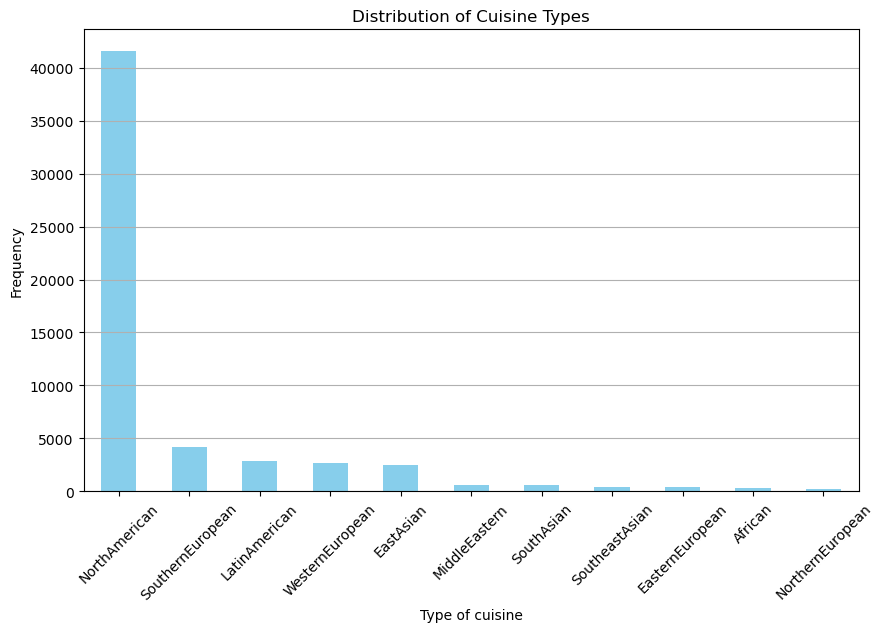

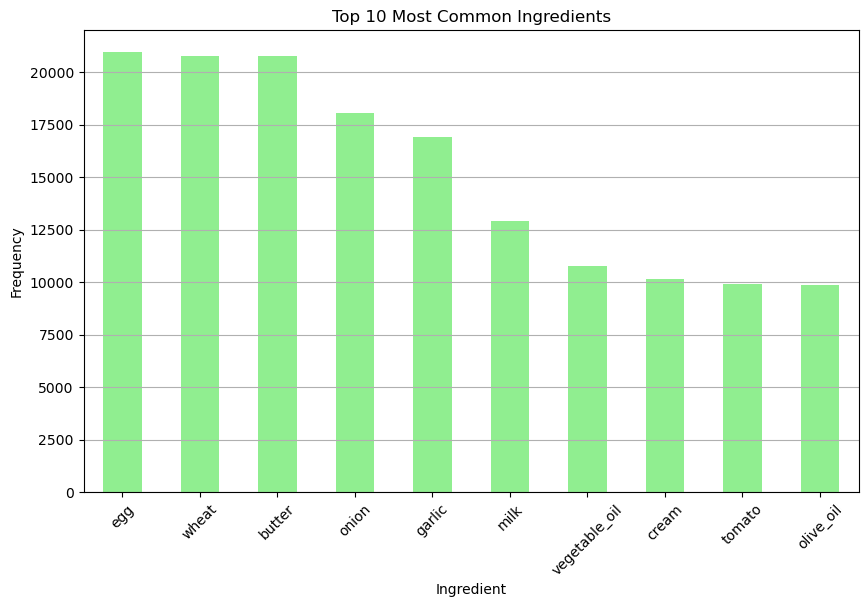

In [12]:
# Histograma para mostrar la distribución de tipos de cocina
plt.figure(figsize=(10, 6))
df2['Type of cuisine'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Cuisine Types")
plt.xlabel("Type of cuisine")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Eliminar el valor vacío ('') antes de contar los ingredientes más comunes
df2_stacked = df2.drop(columns=['Type of cuisine']).stack()
df2_stacked = df2_stacked[df2_stacked != '']

# Gráfico de barras para mostrar los ingredientes más comunes
plt.figure(figsize=(10, 6))
df2_stacked.value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Most Common Ingredients")
plt.xlabel("Ingredient")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



In [13]:
# Crear un grafo no dirigido
G1 = nx.Graph()

# Agregar nodos y aristas al grafo solo para pares de comidas con más de 10 de frecuencia
for _, row in df1.iterrows():
    ingrediente1 = row["Ingredient 1"]
    ingrediente2 = row["Ingredient 2"]
    frecuencia = row["frecuencia"]
    if frecuencia > 40:
        G1.add_edge(ingrediente1, ingrediente2, weight=frecuencia)



In [14]:
# Visualizar información básica de la red
print("Número de nodos:", nx.number_of_nodes(G1))
print("Número de bordes:", nx.number_of_edges(G1))

Número de nodos: 286
Número de bordes: 11810


In [15]:
# Central measures
print("Central Measures:")
print("Average Clustering Coefficient:", nx.average_clustering(G1))
print("Average Degree:", np.mean([degree for node, degree in G1.degree()]))
print("Average Closeness Centrality:", np.mean(list(nx.closeness_centrality(G1).values())))
print("Average Betweenness Centrality:", np.mean(list(nx.betweenness_centrality(G1).values())))

# Global measures
print("\nGlobal Measures:")
print("Number of Nodes:", G1.number_of_nodes())
print("Number of Edges:", G1.number_of_edges())
print("Density:", nx.density(G1))
#print("Diameter:", nx.diameter(G1))


Central Measures:
Average Clustering Coefficient: 0.8161067063743391
Average Degree: 82.58741258741259
Average Closeness Centrality: 0.509842744418074
Average Betweenness Centrality: 0.0025607330648101593

Global Measures:
Number of Nodes: 286
Number of Edges: 11810
Density: 0.28978039504355296


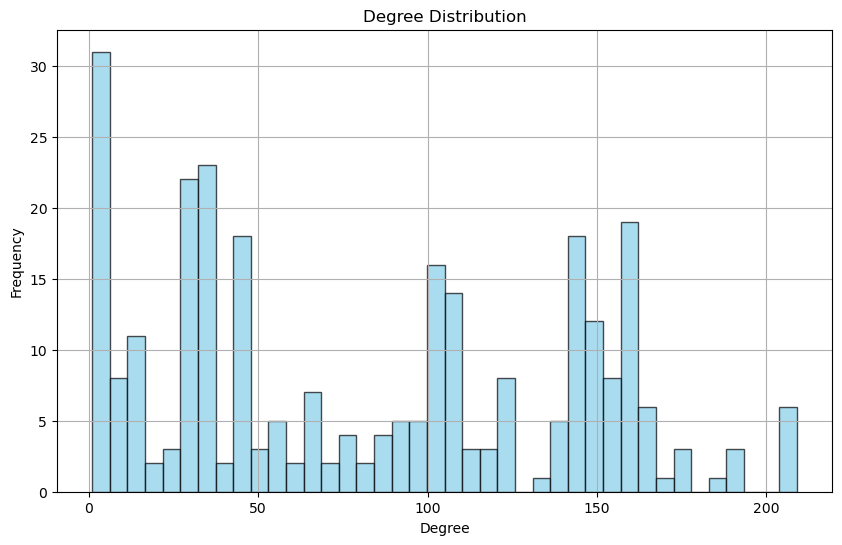

In [16]:
# Graficar el histograma de la distribución de grado
grados = [grado for nodo, grado in G1.degree()]
plt.figure(figsize=(10, 6))
plt.hist(grados, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution")

plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

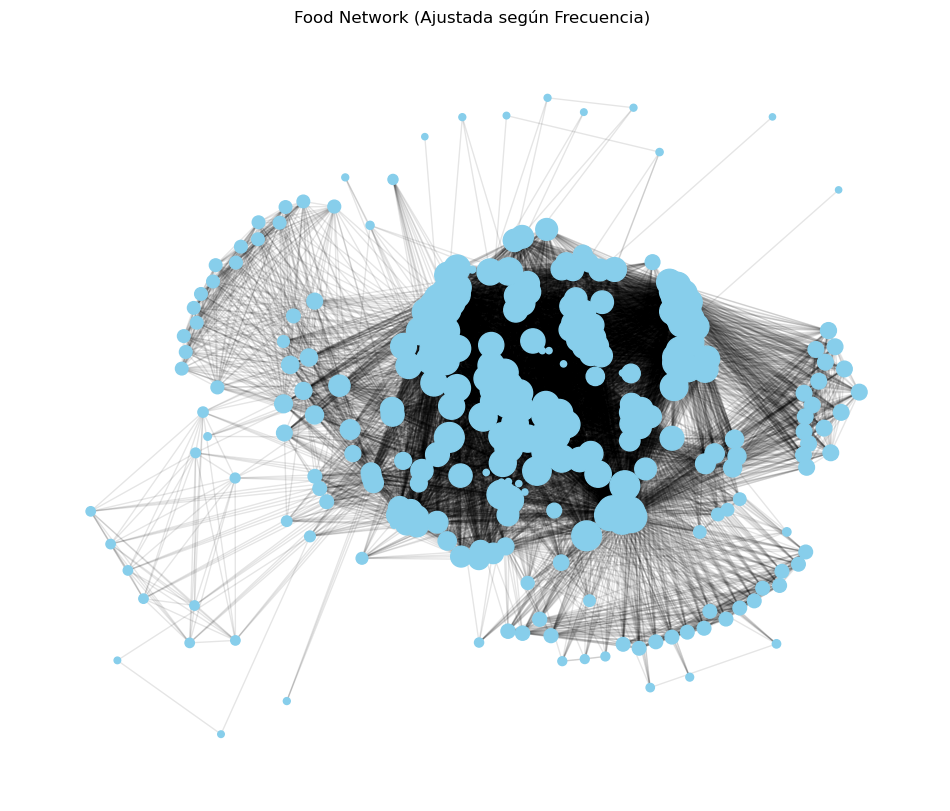

In [17]:
# Ejemplo de ajuste de la visualización de la red
plt.figure(figsize=(12, 10))

min_size = 20  # Tamaño mínimo del nodo
max_size = 500  # Tamaño máximo del nodo

# Obtener los grados de los nodos en el grafo G1
grados1 = dict(G1.degree())

# Crear un diccionario de tamaños de nodos basados en los grados
node_sizes1 = {n: min_size + (max_size - min_size) * (grados1[n] - min(grados1.values())) / (max(grados1.values()) - min(grados1.values())) for n in G1.nodes()}

# Posiciones de los nodos usando un algoritmo de posicionamiento personalizado (por ejemplo, Kamada-Kawai)
pos1 = nx.kamada_kawai_layout(G1)

# Dibujar los nodos
nx.draw_networkx_nodes(G1, pos1, node_size=[node_sizes1[n] for n in G1.nodes()], node_color='skyblue')

# Dibujar las aristas
nx.draw_networkx_edges(G1, pos1, alpha=0.1)


# Añadir etiquetas de nodos
#nx.draw_networkx_labels(G1, pos1, font_size=5, font_color='black')


# Título del gráfico
plt.title("Food Network (Ajustada según Frecuencia) ")

# Mostrar el gráfico
plt.axis('off')  # Desactivar ejes
plt.show()



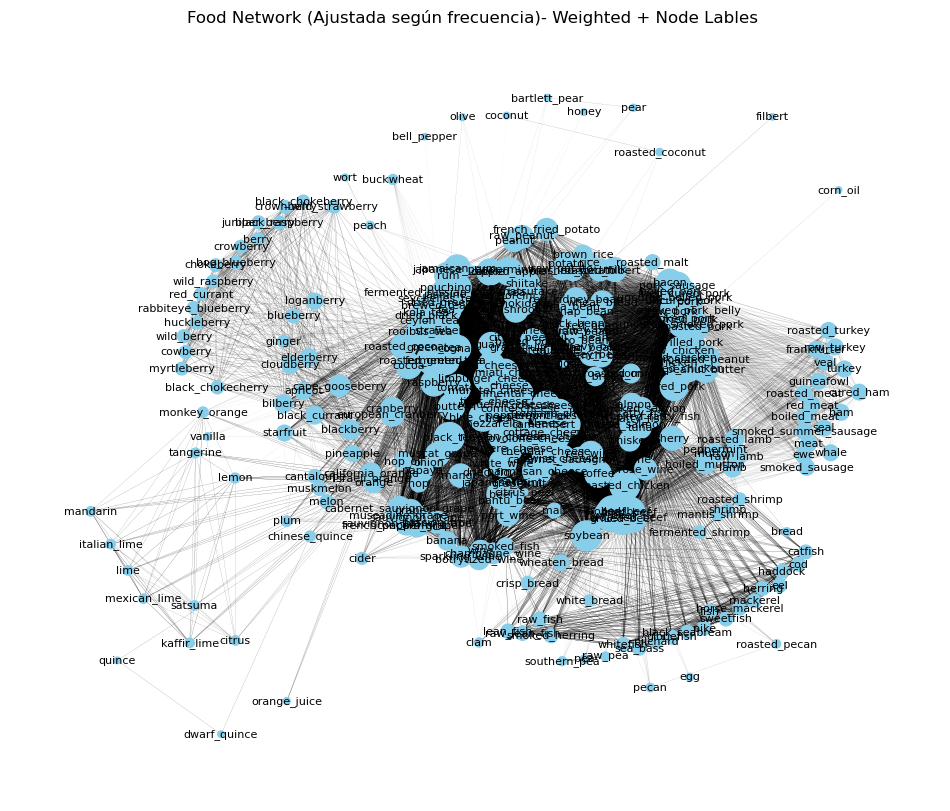

In [18]:
# Ejemplo de ajuste de la visualización de la red
plt.figure(figsize=(12, 10))

min_size = 20  # Tamaño mínimo del nodo
max_size = 500  # Tamaño máximo del nodo

# Obtener los grados de los nodos en el grafo G1
grados1 = dict(G1.degree())

# Crear un diccionario de tamaños de nodos basados en los grados
node_sizes1 = {n: min_size + (max_size - min_size) * (grados1[n] - min(grados1.values())) / (max(grados1.values()) - min(grados1.values())) for n in G1.nodes()}

# Obtener los pesos de las aristas
pesos = nx.get_edge_attributes(G1, 'weight')

# Normalizar los pesos al rango [0.01, 1]
max_peso = max(pesos.values())
min_peso = min(pesos.values())
pesos_normalizados = {e: 0.01 + (1 - 0.01) * ((pesos[e] - min_peso) / (max_peso - min_peso)) for e in pesos}

# Posiciones de los nodos usando un algoritmo de posicionamiento personalizado (por ejemplo, Kamada-Kawai)
pos1 = nx.kamada_kawai_layout(G1)

# Dibujar los nodos
nx.draw_networkx_nodes(G1, pos1, node_size=[node_sizes1[n] for n in G1.nodes()], node_color='skyblue')

# Dibujar las aristas con ancho proporcional al peso
nx.draw_networkx_edges(G1, pos1, width=[pesos_normalizados[e] for e in G1.edges()])

# Añadir etiquetas de nodos
nx.draw_networkx_labels(G1, pos1, font_size=8, font_color='black')


# Título del gráfico
plt.title("Food Network (Ajustada según frecuencia)- Weighted + Node Lables ")

# Mostrar el gráfico
plt.axis('off')  # Desactivar ejes
plt.show()


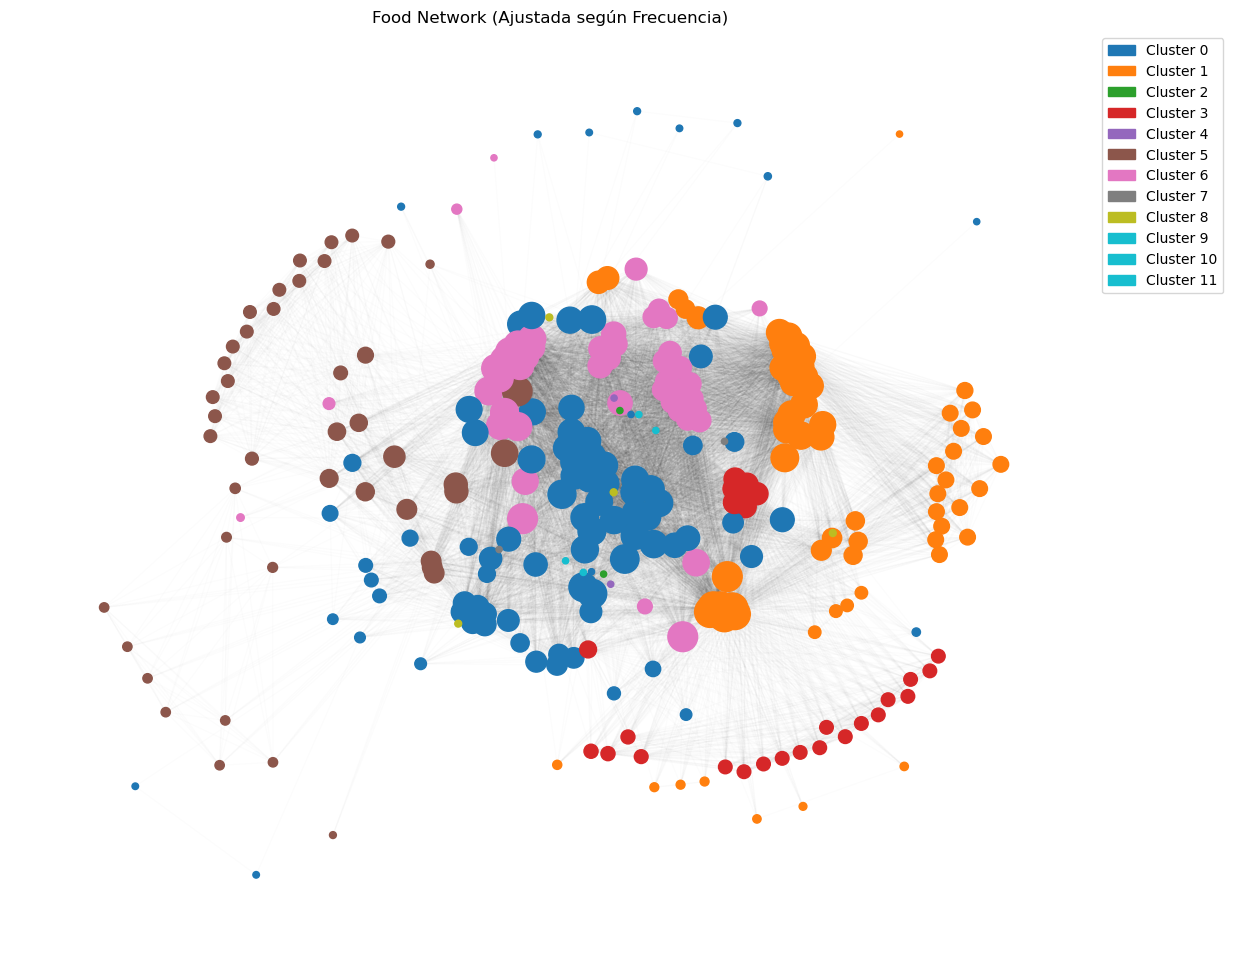

In [19]:
# Colorear los nodos según los clusters


# Detectar comunidades utilizando el algoritmo de Louvain
partition = community.best_partition(G1)



# Colorear los nodos según los clústeres
node_colors = [partition[node] for node in G1.nodes()]


# Ejemplo de ajuste de la visualización de la red
plt.figure(figsize=(14, 12))

min_size = 20  # Tamaño mínimo del nodo
max_size = 500  # Tamaño máximo del nodo

# Obtener los grados de los nodos en el grafo G1
grados1 = dict(G1.degree())

# Crear un diccionario de tamaños de nodos basados en los grados
node_sizes1 = {n: min_size + (max_size - min_size) * (grados1[n] - min(grados1.values())) / (max(grados1.values()) - min(grados1.values())) for n in G1.nodes()}

# Posiciones de los nodos usando un algoritmo de posicionamiento personalizado (por ejemplo, Kamada-Kawai)
pos1 = nx.kamada_kawai_layout(G1)

# Dibujar los nodos y colorearlos según los clusters
nx.draw_networkx_nodes(G1, pos1, node_size=[node_sizes1[n] for n in G1.nodes()], node_color=node_colors, cmap=plt.cm.tab10)

# Dibujar las aristas
nx.draw_networkx_edges(G1, pos1, alpha=0.01)

# Añadir etiquetas de nodos
# nx.draw_networkx_labels(G1, pos1, font_size=5, font_color='black')

# Título del gráfico
plt.title("Food Network (Ajustada según Frecuencia) ")

# Crear una leyenda de colores para los clusters
legend_handles = []
for cluster_id in set(partition.values()):
    color = plt.cm.tab10(cluster_id)  # Obtener el color correspondiente al cluster
    legend_handles.append(mpatches.Patch(color=color, label=f'Cluster {cluster_id}'))


# Dibujar la leyenda
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))


# Mostrar el gráfico
plt.axis('off')  # Desactivar ejes
plt.show()




In [20]:
# Crear un grafo vacío
G2 = nx.Graph()

# Obtener una lista de todos los tipos de cocina únicos en el DataFrame
tipos_de_cocina = nuevas_columnas['Type of cuisine'].unique()

# Crear un generador cíclico de colores utilizando la paleta de colores 'tab10' de Matplotlib
color_generator = cycle(mcolors.TABLEAU_COLORS)

# Crear un diccionario que asigna un color único a cada tipo de cocina
color_dict = {tipo: next(color_generator) for tipo in tipos_de_cocina}

# Agregar nodos al grafo para cada receta
for i, row in nuevas_columnas.iloc[::250].iterrows():
    receta_id = i
    tipo_comida = row['Type of cuisine']
    ingredientes = set(row[1:])  # Convertir la fila en un conjunto de ingredientes
    G2.add_node(receta_id, tipo_comida=tipo_comida, ingredientes=ingredientes)


In [21]:
# Visualizar información básica de la red
print("Número de nodos:", nx.number_of_nodes(G2))

Número de nodos: 226


In [22]:
MIN_SHARED_INGREDIENTS =2
    # Agregar bordes entre las recetas que comparten una cantidad mínima de ingredientes
for u, data_u in G2.nodes(data=True):
    ingredientes_u = data_u['ingredientes']
    for v, data_v in G2.nodes(data=True):
        if u != v:  # Evitar agregar bordes de un nodo a sí mismo
            ingredientes_v = data_v['ingredientes']
            shared_ingredients = ingredientes_u.intersection(ingredientes_v)
            if len(shared_ingredients) >= MIN_SHARED_INGREDIENTS:
                G2.add_edge(u, v, shared_ingredients=shared_ingredients)
                

print("Grafo creado exitosamente con", nx.number_of_nodes(G2), "nodos y", nx.number_of_edges(G2), "bordes.")

Grafo creado exitosamente con 226 nodos y 15035 bordes.


In [23]:
# Central measures
print("Central Measures:")
print("Average Clustering Coefficient:", nx.average_clustering(G2))
print("Average Degree:", np.mean([degree for node, degree in G2.degree()]))
print("Average Closeness Centrality:", np.mean(list(nx.closeness_centrality(G2).values())))
print("Average Betweenness Centrality:", np.mean(list(nx.betweenness_centrality(G2).values())))

# Global measures
print("\nGlobal Measures:")
print("Number of Nodes:", G2.number_of_nodes())
print("Number of Edges:", G2.number_of_edges())
print("Density:", nx.density(G2))
#print("Diameter:", nx.diameter(G2))


Central Measures:
Average Clustering Coefficient: 0.7697779772080938
Average Degree: 133.05309734513276
Average Closeness Centrality: 0.7168433636796241
Average Betweenness Centrality: 0.0018001123753336138

Global Measures:
Number of Nodes: 226
Number of Edges: 15035
Density: 0.591347099311701


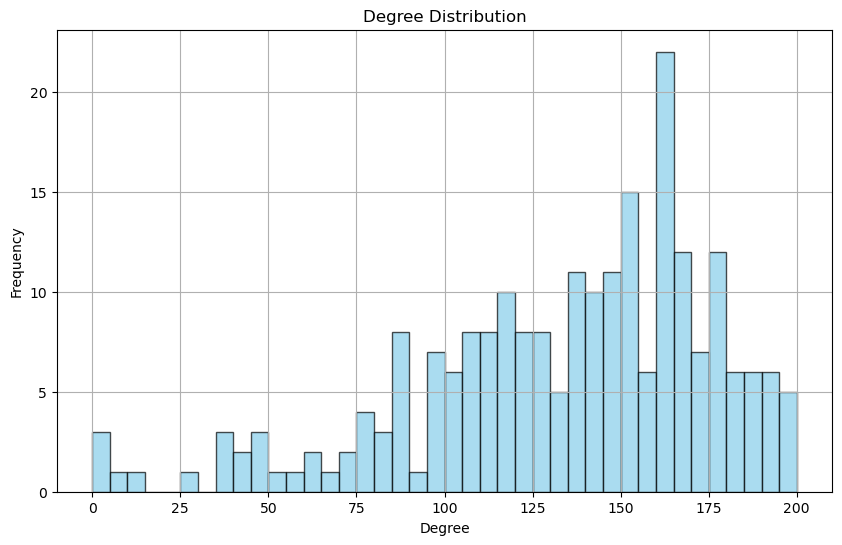

In [24]:
#Plot the histogram of the degree distribution
degrees = [degree for node, degree in G2.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

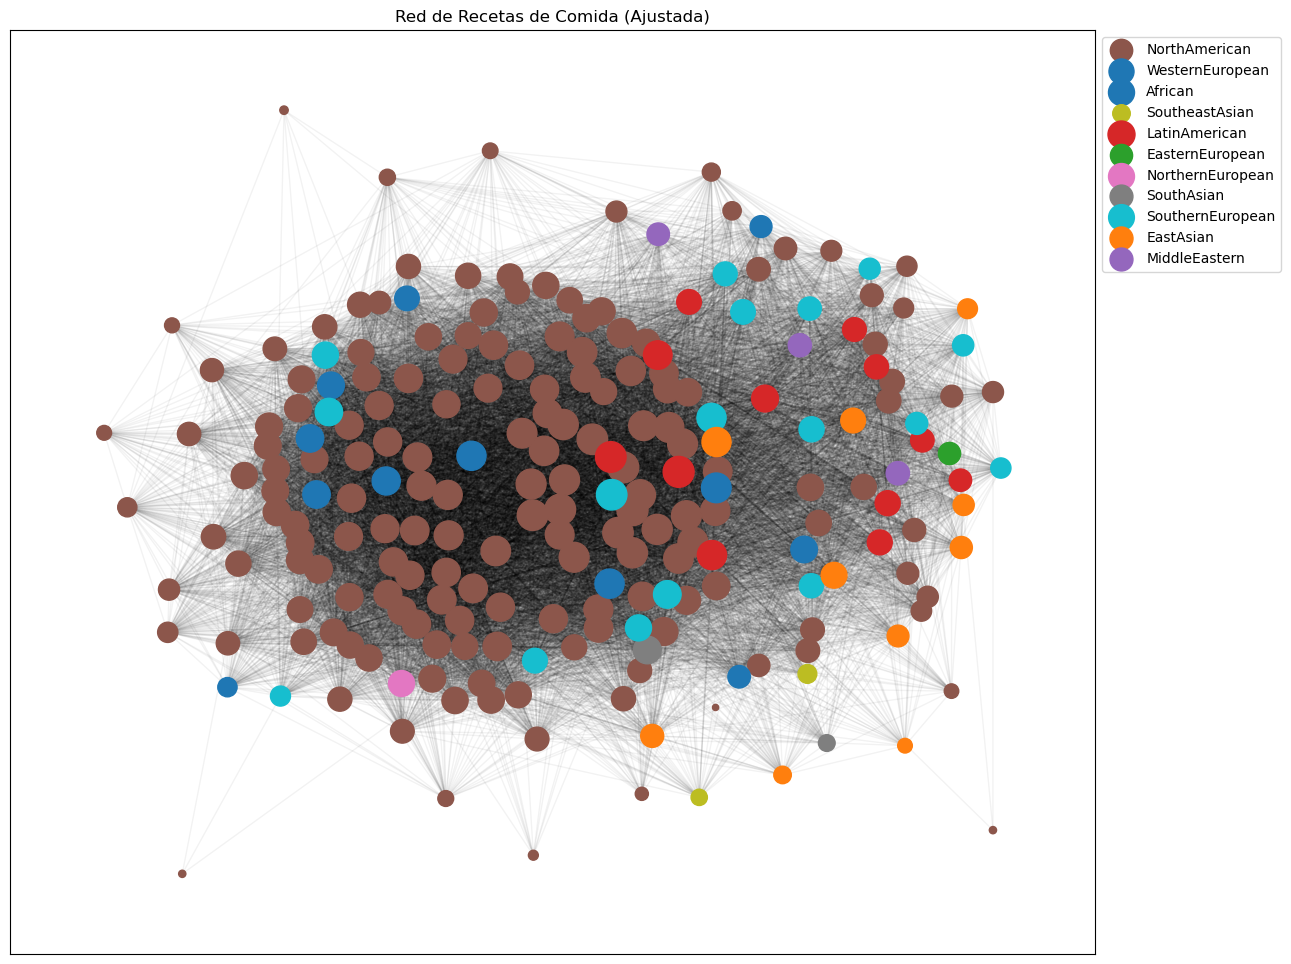

In [25]:
# Obtener los colores de los nodos basados en el tipo de cocina

min_size = 20  # Tamaño mínimo del nodo
max_size = 500  # Tamaño máximo del nodo

# Obtener los grados de los nodos en el grafo G2
grados2 = dict(G2.degree())

# Crear un diccionario de tamaños de nodos
node_sizes2 = {n: min_size + (max_size - min_size) * (grados2[n] - min(grados2.values())) / (max(grados2.values()) - min(grados2.values())) for n in G2.nodes()}

# Ejemplo de ajuste de la visualización de la red
plt.figure(figsize=(14, 12))

# Posiciones de los nodos usando un algoritmo de posicionamiento personalizado (por ejemplo, Kamada-Kawai)
pos2 = nx.kamada_kawai_layout(G2)

# Dibujar nodos con colores distintos para diferentes tipos de comida y tamaños relativos a los grados
for tipo_comida in set(nx.get_node_attributes(G2, 'tipo_comida').values()):
    nodes_of_type = [n for n, d in G2.nodes(data=True) if d['tipo_comida'] == tipo_comida]
    nx.draw_networkx_nodes(G2, pos2, nodelist=nodes_of_type, node_size=[node_sizes2[n] for n in nodes_of_type], node_color=color_dict[tipo_comida], label=tipo_comida)

# Dibujar bordes con transparencia para evitar saturar la imagen
nx.draw_networkx_edges(G2, pos2, alpha=0.05)

# No mostrar etiquetas de los nodos
# nx.draw_networkx_labels(G2, pos2, labels={node: str(node) for node in subset_of_nodes}, bbox=None)

plt.title("Red de Recetas de Comida (Ajustada)- Kamada Kawai")
# Ajustar la posición del legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Red de Recetas de Comida (Ajustada)")
plt.show()

## Latinoamerica

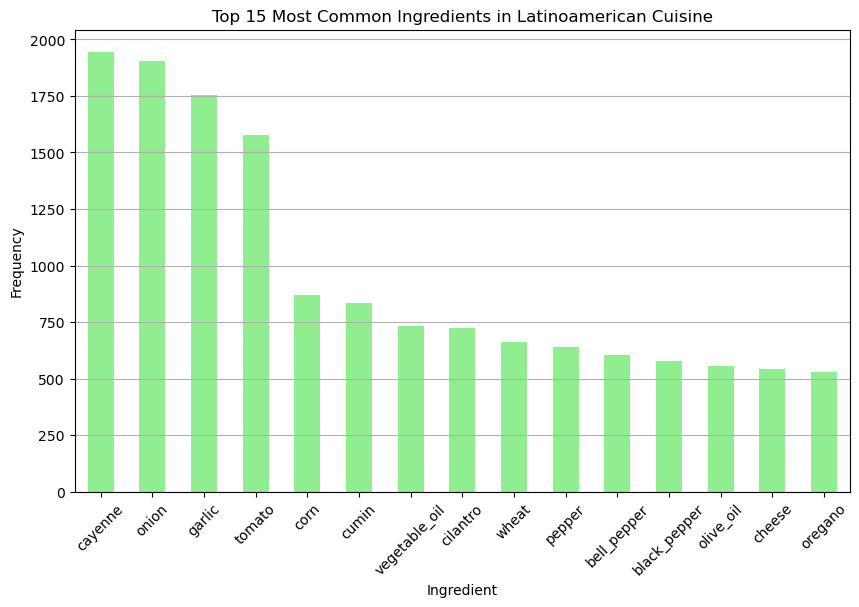

In [26]:
# Filtrar el DataFrame para incluir solo recetas con la etiqueta "LatinAmerica"
latin_america_recipes = nuevas_columnas[nuevas_columnas['Type of cuisine'] == 'LatinAmerican']

# Verificar si hay datos para la cocina latinoamericana
if not latin_america_recipes.empty:
    # Apilar los ingredientes y eliminar los valores vacíos ('')
    latinoamerican_stacked = latin_america_recipes.drop(columns=['Type of cuisine']).stack()
    latinoamerican_stacked = latinoamerican_stacked[latinoamerican_stacked != '']

    # Verificar si hay datos apilados
    if not latinoamerican_stacked.empty:
        # Gráfico de barras para mostrar los 15 ingredientes más comunes
        plt.figure(figsize=(10, 6))
        latinoamerican_stacked.value_counts().head(15).plot(kind='bar', color='lightgreen')
        plt.title("Top 15 Most Common Ingredients in Latinoamerican Cuisine")
        plt.xlabel("Ingredient")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()
    else:
        print("No hay datos suficientes para generar el gráfico de barras.")
else:
    print("No hay datos para el tipo de cocina 'Latinoamericana'.")


In [27]:
# Create an empty graph
G3 = nx.Graph()

# Filter the DataFrame to include only recipes with the label "LatinAmerica"
latin_america_recipes = nuevas_columnas[nuevas_columnas['Type of cuisine'] == 'LatinAmerican']

# Create a set of unique ingredients for all Latin American recipes
latin_america_ingredients = set()
for _, row in latin_america_recipes.iterrows():
    ingredients = set(row[1:])  # Exclude the first column which is the recipe ID
    latin_america_ingredients.update(ingredients)

# Add nodes to the graph for each Latin American recipe
for i, row in latin_america_recipes.iloc[::5].iterrows():  # Select every 5th recipe
    recipe_id = i
    recipe_ingredients = set(row[1:])  # Exclude the first column which is the recipe ID
    G3.add_node(recipe_id, tipo_comida='LatinAmerican', ingredientes=recipe_ingredients)

# Visualize basic information about the network
print("Number of nodes:", nx.number_of_nodes(G3))

MIN_SHARED_INGREDIENTS = 2

# Add edges between recipes that share a minimum amount of ingredients
for u, data_u in G3.nodes(data=True):
    ingredients_u = data_u['ingredientes']
    for v, data_v in G3.nodes(data=True):
        if u != v:  # Avoid adding edges from a node to itself
            ingredients_v = data_v['ingredientes']
            shared_ingredients = ingredients_u.intersection(ingredients_v)
            if len(shared_ingredients) >= MIN_SHARED_INGREDIENTS:
                G3.add_edge(u, v, shared_ingredients=shared_ingredients)

print("Graph successfully created with", nx.number_of_nodes(G3), "nodes and", nx.number_of_edges(G3), "edges.")


Number of nodes: 584
Graph successfully created with 584 nodes and 140105 edges.


In [28]:
# Central measures
print("Central Measures:")
print("Average Clustering Coefficient:", nx.average_clustering(G3))
print("Average Degree:", np.mean([degree for node, degree in G3.degree()]))
print("Average Closeness Centrality:", np.mean(list(nx.closeness_centrality(G3).values())))
print("Average Betweenness Centrality:", np.mean(list(nx.betweenness_centrality(G3).values())))

# Global measures
print("\nGlobal Measures:")
print("Number of Nodes:", G3.number_of_nodes())
print("Number of Edges:", G3.number_of_edges())
print("Density:", nx.density(G3))
#print("Diameter:", nx.diameter(G3))


Central Measures:
Average Clustering Coefficient: 0.9170938461626917
Average Degree: 479.81164383561645
Average Closeness Centrality: 0.866072320100666
Average Betweenness Centrality: 0.000304115919448473

Global Measures:
Number of Nodes: 584
Number of Edges: 140105
Density: 0.8230045348809888


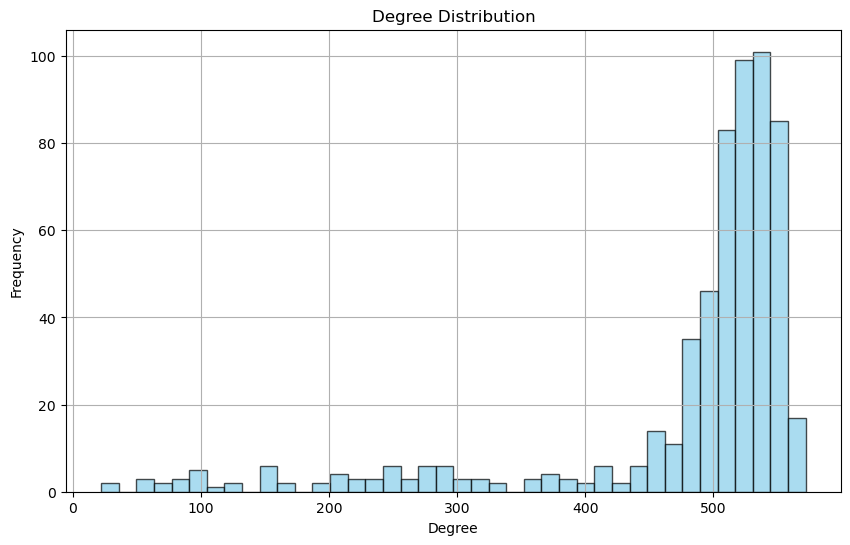

In [29]:
#Plot the histogram of the degree distribution
degrees = [degree for node, degree in G3.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

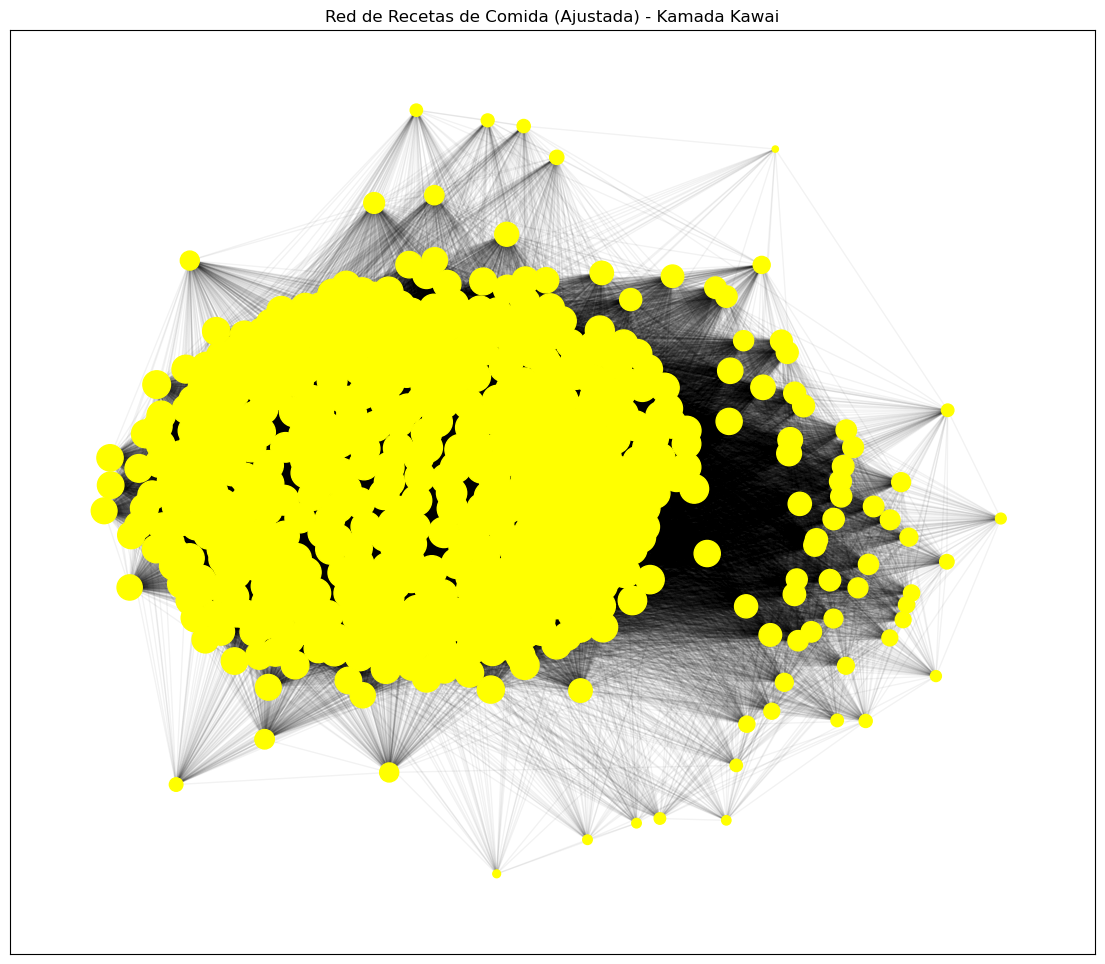

In [30]:
# Set node sizes based on node degrees
min_size = 20  # Minimum node size
max_size = 500  # Maximum node size
grados3 = dict(G3.degree())
node_sizes3 = {n: min_size + (max_size - min_size) * (grados3[n] - min(grados3.values())) / (max(grados3.values()) - min(grados3.values())) for n in G3.nodes()}

# Plot the network
plt.figure(figsize=(14, 12))
pos3 = nx.kamada_kawai_layout(G3)
nx.draw_networkx_nodes(G3, pos3, node_size=[node_sizes3[n] for n in G3.nodes()], node_color='yellow')
nx.draw_networkx_edges(G3, pos3, alpha=0.05)
plt.title("Red de Recetas de Comida (Ajustada) - Kamada Kawai")
plt.show()

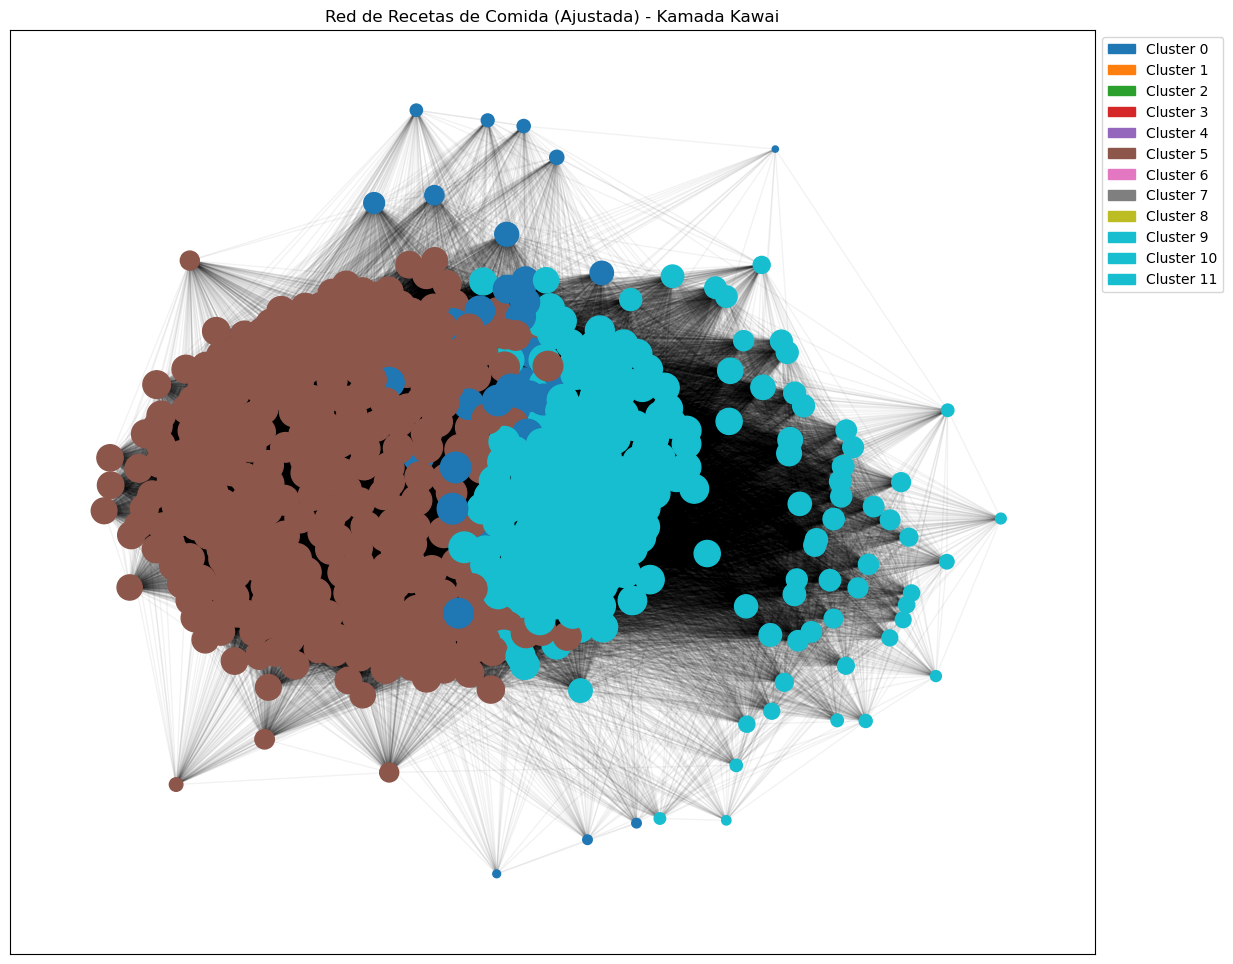

In [31]:
# Detectar comunidades utilizando el algoritmo de Louvain
partition2 = community.best_partition(G3)

# Crear una lista de colores para los nodos basados en los clusters detectados
node_colors3 = [partition2[node] for node in G3.nodes()]

# Plot the network with nodes colored by clusters
plt.figure(figsize=(14, 12))
pos3 = nx.kamada_kawai_layout(G3)
nx.draw_networkx_nodes(G3, pos3, node_size=[node_sizes3[n] for n in G3.nodes()], node_color=node_colors3, cmap=plt.cm.tab10)
nx.draw_networkx_edges(G3, pos3, alpha=0.05)
plt.title("Red de Recetas de Comida (Ajustada) - Kamada Kawai")
# Dibujar la leyenda
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


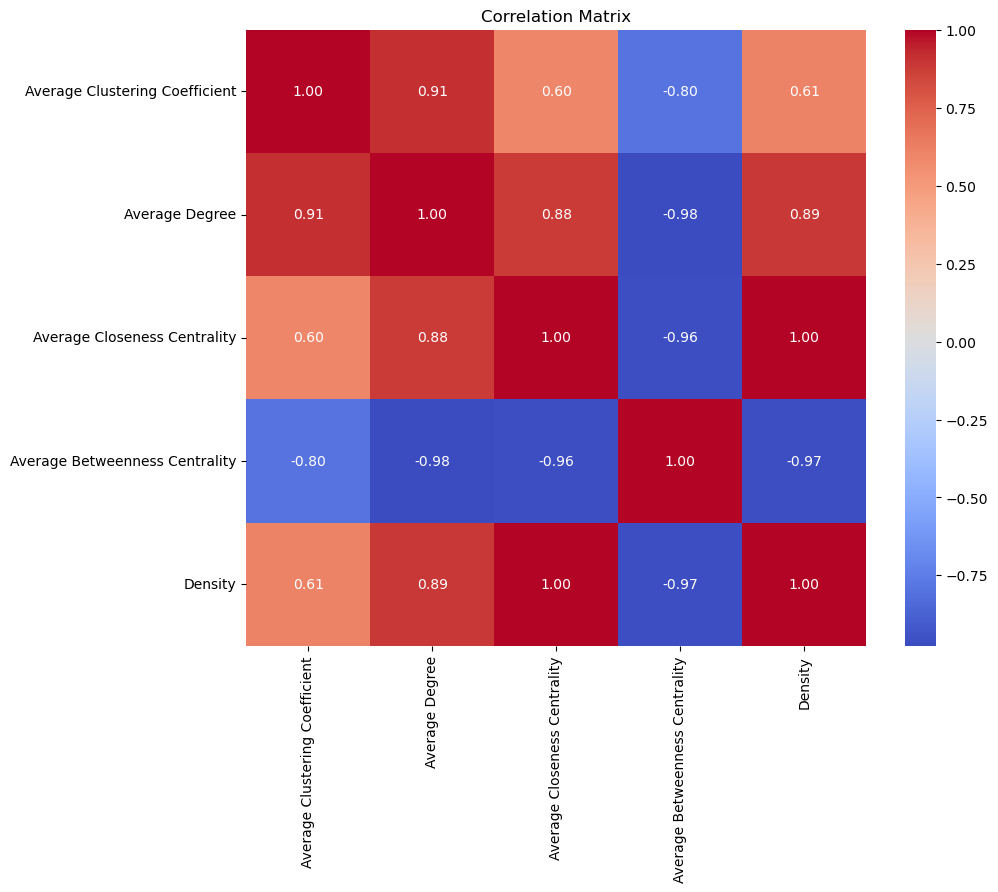

In [32]:

# Calcular medidas para cada red
red1_medidas = {
    "Average Clustering Coefficient": nx.average_clustering(G1),
    "Average Degree": np.mean([grado for nodo, grado in G1.degree()]),
    "Average Closeness Centrality": np.mean(list(nx.closeness_centrality(G1).values())),
    "Average Betweenness Centrality": np.mean(list(nx.betweenness_centrality(G1).values())),
    "Density": nx.density(G1)
}

red2_medidas = {
    "Average Clustering Coefficient": nx.average_clustering(G2),
    "Average Degree": np.mean([grado for nodo, grado in G2.degree()]),
    "Average Closeness Centrality": np.mean(list(nx.closeness_centrality(G2).values())),
    "Average Betweenness Centrality": np.mean(list(nx.betweenness_centrality(G2).values())),
    "Density": nx.density(G2)
}

red3_medidas = {
    "Average Clustering Coefficient": nx.average_clustering(G3),
    "Average Degree": np.mean([grado for nodo, grado in G3.degree()]),
    "Average Closeness Centrality": np.mean(list(nx.closeness_centrality(G3).values())),
    "Average Betweenness Centrality": np.mean(list(nx.betweenness_centrality(G3).values())),
    "Density": nx.density(G3)
}

# Crear DataFrames para cada red
red1_df = pd.DataFrame(red1_medidas, index=["Red 1"])
red2_df = pd.DataFrame(red2_medidas, index=["Red 2"])
red3_df = pd.DataFrame(red3_medidas, index=["Red 3"])

# Concatenar los DataFrames para crear uno solo con todas las medidas
all_reds_df = pd.concat([red1_df, red2_df, red3_df])

# Calcular la correlación entre las medidas
correlation_matrix = all_reds_df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


In [33]:
# Concatenar los DataFrames para crear uno solo con todas las medidas
reds_1vs2df = pd.concat([red1_df, red2_df])

reds_1vs3df = pd.concat([red1_df, red3_df])

reds_2vs3df = pd.concat([red2_df, red3_df])


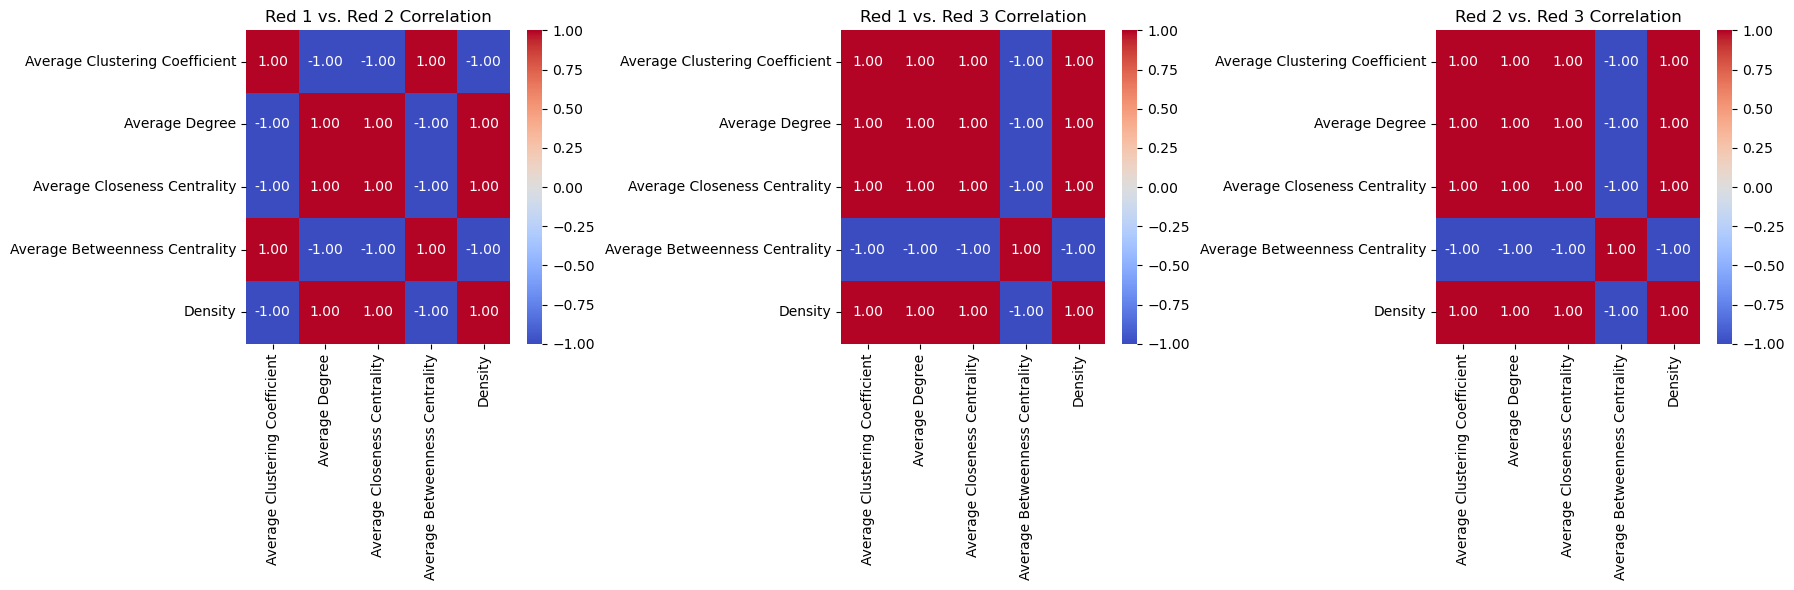

In [34]:

# Calcular la correlación entre las medidas
correlation_matrix12 = reds_1vs2df.corr()
# Calcular la correlación entre las medidas
correlation_matrix13 = reds_1vs3df.corr()
# Calcular la correlación entre las medidas
correlation_matrix23 = reds_2vs3df.corr()

# Graficar las matrices de correlación como subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Matriz de correlación Red 1 vs. Red 2
sns.heatmap(correlation_matrix12, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=axes[0])
axes[0].set_title('Red 1 vs. Red 2 Correlation')

# Matriz de correlación Red 1 vs. Red 3
sns.heatmap(correlation_matrix13, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=axes[1])
axes[1].set_title('Red 1 vs. Red 3 Correlation')

# Matriz de correlación Red 2 vs. Red 3
sns.heatmap(correlation_matrix23, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, ax=axes[2])
axes[2].set_title('Red 2 vs. Red 3 Correlation')

plt.tight_layout()
plt.show()
